In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index = pd.read_csv("economic_index.csv")

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
## drop uncessary columns
## axis = 1 # columns
## axis = 2 # row
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)


In [6]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

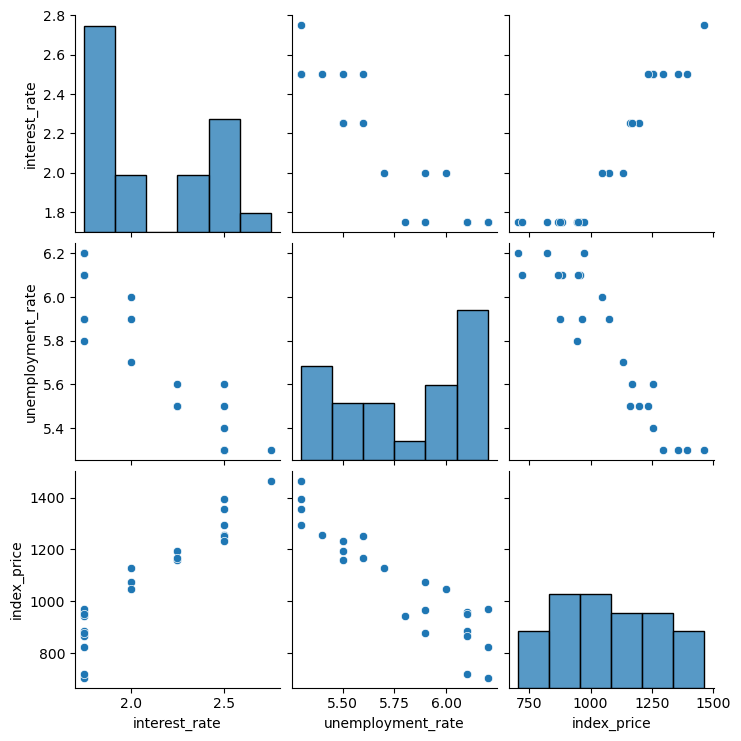

In [8]:
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


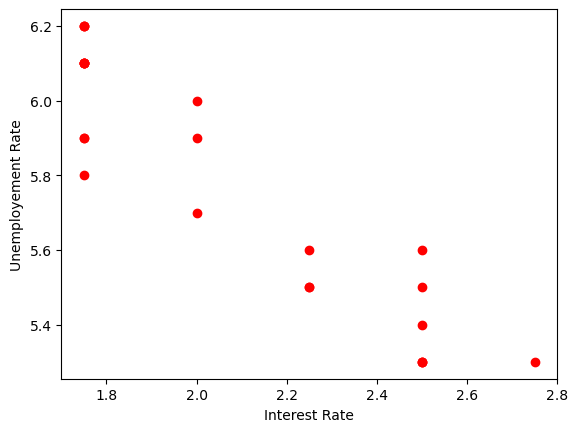

In [12]:
## Visualise better 
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployement Rate')
plt.show()

In [15]:
## Independent and dependent features
X = df_index[['interest_rate','unemployment_rate']]

In [16]:
y = df_index.iloc[:,-1]

In [17]:
type(y)

pandas.core.series.Series

In [18]:
## train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
import seaborn as sns

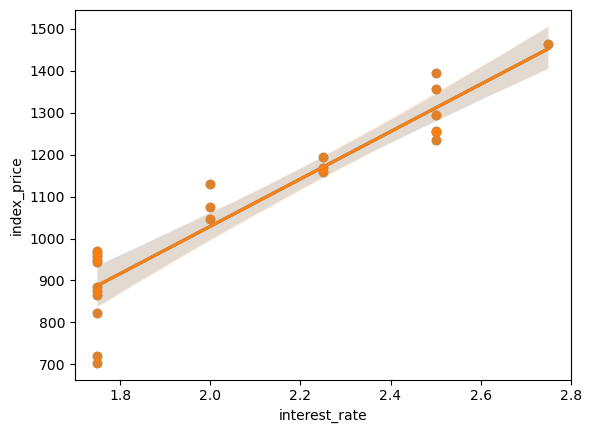

In [23]:
sns.regplot(x = df_index['interest_rate'],y = df_index['index_price'])
plt.show()

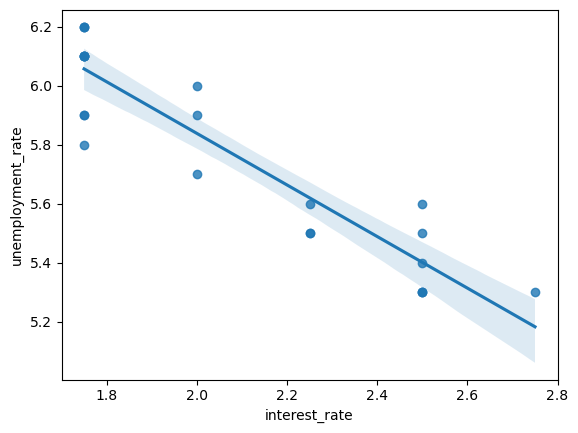

In [24]:
sns.regplot(x = df_index['interest_rate'],y = df_index['unemployment_rate'])
plt.show()

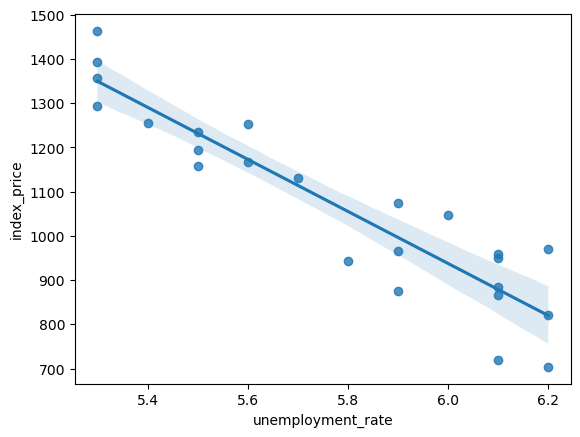

In [25]:
sns.regplot(x = df_index['unemployment_rate'],y = df_index['index_price'])
plt.show()

In [26]:
## Standard scaling
from sklearn.preprocessing import StandardScaler


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [29]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression()

In [30]:
regression.fit(X_train,y_train)

LinearRegression()

#### Cross Validation 

In [32]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [33]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [34]:
np.mean(validation_score)

-5914.828180162388

In [35]:
### Prediction
y_pred = regression.predict(X_test)

In [36]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [37]:
## performance metrics
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [38]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error: ",mse)
print("Mean absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)

Mean Squared Error:  8108.567426306604
Mean absolute Error:  73.80444932337097
Root Mean Squared Error:  90.04758423359621


In [39]:
from sklearn.metrics import r2_score

In [40]:
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [ ]:
# Adjusted R^2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

#### ASSUMPTIONS

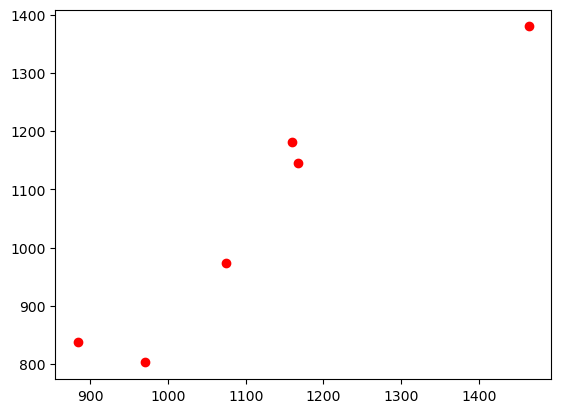

In [43]:
plt.scatter(y_test,y_pred,color='r')
plt.show()


In [44]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


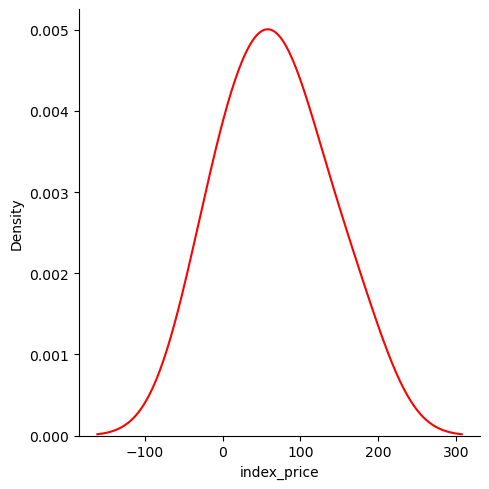

In [49]:
sns.displot(residuals,kind='kde',color='r')
plt.show()
## Normal curve = moddel has performed well

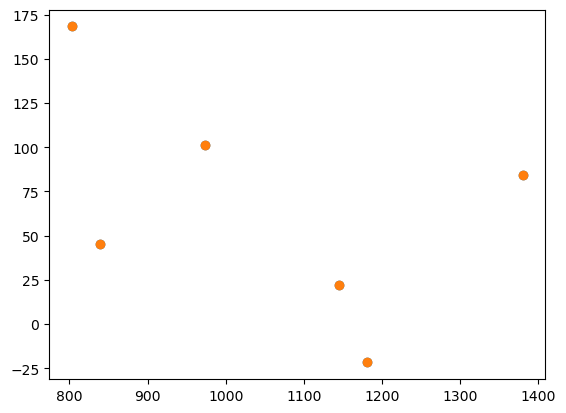

In [51]:
##Scatter plot with respect to prediction and residuals

plt.scatter(y_pred,residuals)
plt.show()
